# Environment  
## Load required packages  


In [37]:
library(Seurat)
library(tidyverse)
library(viridis)


Warning message:
"le package 'Seurat' a été compilé avec la version R 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject

Warning message:
"le package 'tidyverse' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'tibble' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'tidyr' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'readr' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'purrr' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'dplyr' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'stringr' a été compilé avec la version R 4.2.3"
Warning message:
"le 

In [82]:
sample <- "LGG85_diff" # sample_condition
condition <- str_split_1(sample, '_')[2]

# Loading data  
*min.cells* : Include features detected in at least this many cells. Will subset the counts matrix as well.  
*min.features* : Include cells where at least this many features are detected.  


In [22]:
path <- paste0("../../../Processing/samples/", sample)

mtx_obj <- Seurat::ReadMtx(mtx = paste(path,"/matrix.mtx.gz",sep = ""), 
                           cells = paste(path,"/barcodes.tsv.gz",sep = ""),
                           features = paste(path,"/features.tsv.gz",sep = ""))

seurat_obj <- CreateSeuratObject(counts = mtx_obj,
                                        min.cells = 3, min.features = 200,
                                        project = sample)

seurat_obj@meta.data$condition <- condition     
seurat_obj    


An object of class Seurat 
28541 features across 3258 samples within 1 assay 
Active assay: RNA (28541 features, 0 variable features)

In [1]:
## Load required packages  
library(Seurat)
library(DoubletFinder)
library(tidyverse)
library(viridis)


seurat_obj <- readRDS(file = paste0("./results/QC_", sample, ".rds"))
                
seurat_obj                  


pc = 15
doublet_rate = 0.32


# Doublet
### Pre-process standard workflow  
seurat_obj <- FindNeighbors(seurat_obj, dims = 1:pc)
seurat_obj <- FindClusters(seurat_obj)
seurat_obj <- RunUMAP(seurat_obj, dims = 1:pc)


### pk optimisation  
sweep.res.list <- paramSweep_v3(seurat_obj, PCs = 1:pc, sct = FALSE)
sweep.stats <- summarizeSweep(sweep.res.list, GT=FALSE)
bcmvn <- find.pK(sweep.stats)

ggplot(bcmvn, aes(pK, BCmetric, group=1)) +
      geom_point() +
      geom_line()

# we select the pK that corresponds to max bcmvn to optimize doublet detection 
pK <- bcmvn %>%
  filter(BCmetric == max(BCmetric)) %>%
  select(pK) 
pK <- as.numeric(as.character(pK[[1]]))


### Homotypic Doublet Proportion Estimate 
annotations <- seurat_obj@meta.data$seurat_clusters
homotypic.prop <- modelHomotypic(annotations)
nExp_poi <- round(doublet_rate*nrow(seurat_obj@meta.data))  
nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))

# run doubletFinder 
seurat_obj <- doubletFinder_v3(seurat_obj, 
                                     PCs = 1:pc, 
                                     pN = 0.25, 
                                     pK = pK, 
                                     nExp = nExp_poi.adj,
                                     reuse.pANN = FALSE, sct = FALSE)


Warning message:
"le package 'Seurat' a été compilé avec la version R 4.2.3"


: 

: 

In [184]:
col = colnames(seurat_obj[[]])[which(grepl('^DF.classifications', colnames(seurat_obj[[]])) ==TRUE )]
col

[1] "DF.classifications_0.25_0.06_760"

In [140]:
colnames(seurat_obj[[]])[colnames(seurat_obj[[]])[which(grepl('^DF.classifications', colnames(seurat_obj[[]])) ==TRUE )]]

[1] NA

In [152]:
head(seurat_obj[[]][col])

,DF.classifications_0.25_0.06_760
,<chr>
AAACCCAGTGAATTGA-1,Singlet
AAACCCAGTGTCATCA-1,Singlet
AAACCCATCCCGATCT-1,Singlet
AAACGCTGTCCACTTC-1,Singlet
AAAGAACCAGCAGGAT-1,Singlet
AAAGAACGTGAGATTA-1,Singlet


In [172]:
head(seurat_obj@meta.data[12]) 

,DF.classifications_0.25_0.06_760
,<chr>
AAACCCAGTGAATTGA-1,Singlet
AAACCCAGTGTCATCA-1,Singlet
AAACCCATCCCGATCT-1,Singlet
AAACGCTGTCCACTTC-1,Singlet
AAAGAACCAGCAGGAT-1,Singlet
AAAGAACGTGAGATTA-1,Singlet


In [187]:
seurat_obj@meta.data$s <- seurat_obj@meta.data[12][,1]
seurat_obj@meta.data[12][,1]<- NULL

In [188]:
seurat_obj[[]]

,orig.ident,nCount_RNA,nFeature_RNA,condition,percent.mt,percent.ribosomal,largest_gene,percent.largest_gene,RNA_snn_res.0.8,seurat_clusters,pANN_0.25_0.06_760,s
,<fct>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<chr>
AAACCCAGTGAATTGA-1,LGG85_diff,18207,5156,diff,13.6595815,13.9671555,MALAT1,4.130280,0,0,0.17105263,Singlet
AAACCCAGTGTCATCA-1,LGG85_diff,19769,5427,diff,12.9799181,11.4674490,MT-CO3,2.822601,0,0,0.16666667,Singlet
AAACCCATCCCGATCT-1,LGG85_diff,1208,616,diff,0.3311258,38.6589404,RPL30,1.655629,7,7,0.01754386,Singlet
AAACCCATCGGTGAAG-1,LGG85_diff,20051,5175,diff,18.8918258,10.0543614,MT-CO2,3.610792,9,9,0.33333333,Doublet
AAACGCTAGCACTCAT-1,LGG85_diff,19548,5899,diff,8.0877839,6.5531001,MALAT1,3.509310,4,4,0.37719298,Doublet
AAACGCTGTCCACTTC-1,LGG85_diff,42705,8070,diff,14.4432736,8.6476993,MALAT1,3.482028,0,0,0.20175439,Singlet
AAAGAACCAGCAGGAT-1,LGG85_diff,23055,6131,diff,11.9106484,9.9934938,MALAT1,3.096942,4,4,0.28947368,Singlet
AAAGAACGTGAGATTA-1,LGG85_diff,29830,7243,diff,7.5729132,11.3174656,MALAT1,1.837077,2,2,0.23245614,Singlet
AAAGAACTCATCGGGC-1,LGG85_diff,16701,5278,diff,13.8075564,10.0712532,MALAT1,3.017783,0,0,0.24561404,Singlet


In [126]:
colnames(seurat_obj[[]])[12]

[1] "DF.classifications_0.25_0.06_760"

In [145]:
df <- seurat_obj[[]]
colnames(df)[colnames(df) == col] <- 'newName'
#seurat_obj[[]] <- df

ERROR: Error in `[[<-`(`*tmp*`, , value = structure(list(orig.ident = structure(c(1L, : l'argument "i" est manquant, avec aucune valeur par défaut


In [144]:
df

,orig.ident,nCount_RNA,nFeature_RNA,condition,percent.mt,percent.ribosomal,largest_gene,percent.largest_gene,RNA_snn_res.0.8,seurat_clusters,pANN_0.25_0.06_760,newName
,<fct>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<chr>
AAACCCAGTGAATTGA-1,LGG85_diff,18207,5156,diff,13.6595815,13.967155,MALAT1,4.130280,0,0,0.17105263,Singlet
AAACCCAGTGTCATCA-1,LGG85_diff,19769,5427,diff,12.9799181,11.467449,MT-CO3,2.822601,0,0,0.16666667,Singlet
AAACCCATCCCGATCT-1,LGG85_diff,1208,616,diff,0.3311258,38.658940,RPL30,1.655629,7,7,0.01754386,Singlet
AAACGCTGTCCACTTC-1,LGG85_diff,42705,8070,diff,14.4432736,8.647699,MALAT1,3.482028,0,0,0.20175439,Singlet
AAAGAACCAGCAGGAT-1,LGG85_diff,23055,6131,diff,11.9106484,9.993494,MALAT1,3.096942,4,4,0.28947368,Singlet
AAAGAACGTGAGATTA-1,LGG85_diff,29830,7243,diff,7.5729132,11.317466,MALAT1,1.837077,2,2,0.23245614,Singlet
AAAGAACTCATCGGGC-1,LGG85_diff,16701,5278,diff,13.8075564,10.071253,MALAT1,3.017783,0,0,0.24561404,Singlet
AAAGGATCACATGGTT-1,LGG85_diff,27740,6653,diff,14.5421774,5.836337,MT-CO2,2.422495,2,2,0.24122807,Singlet
AAAGGATTCCGTCAAA-1,LGG85_diff,10468,3442,diff,16.7749331,10.116546,MALAT1,5.235002,0,0,0.13157895,Singlet


< table of extent 0 >

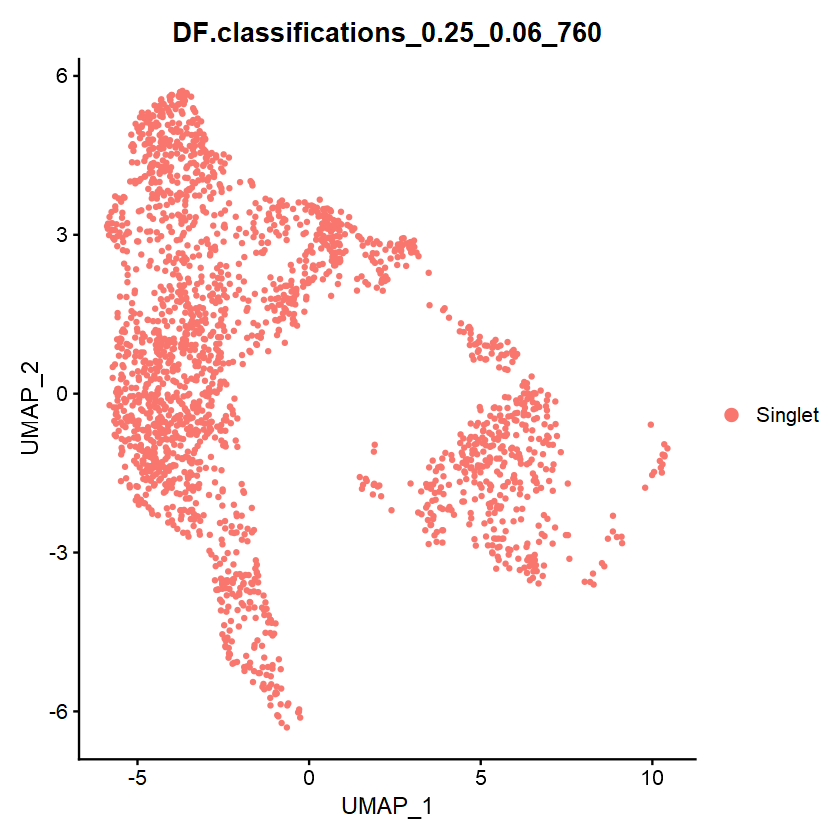

In [106]:
### Singlets and doublets  

# visualize doublets
DimPlot(seurat_obj, reduction = 'umap', group.by = col)

# number of singlets and doublets
table(seurat_obj@meta.data$col)

### Filter out doublets



In [107]:
subset(
  seurat_obj,
  col == "Singlet"
  ) -> seurat_obj

seurat_obj

ERROR: Error in FetchData.Seurat(object = object, vars = unique(x = expr.char[vars.use]), : None of the requested variables were found: 


In [38]:
seurat_obj <- readRDS(file = paste0("./results/QC_", "LGG85_prolif", ".rds"))
                
seurat_obj                  


An object of class Seurat 
25121 features across 1480 samples within 1 assay 
Active assay: RNA (25121 features, 2000 variable features)
 1 dimensional reduction calculated: pca

In [44]:
subset(
  seurat_obj,
  percent.mt < 8000
  ) -> seurat_obj

seurat_obj

An object of class Seurat 
25121 features across 1316 samples within 1 assay 
Active assay: RNA (25121 features, 2000 variable features)
 1 dimensional reduction calculated: pca

# QC metrics  
**nCount_RNA** : the total number of reads (or more correctly UMIs) in the dataset  
**nFeature_RNA** : the number of observed genes (anything with a nonzero count)

##  <span style="color:#296d98;"> Parameters </span>  


In [28]:
## nFeature
x1 = 500
x2 = 10500
## Mitochondrion
x3 = 20


## MT genes  
Single cell datasets can be filled with large numbers of reads coming from mitochondria. These often indicate a sick cell undergoing apoptosis.


In [30]:
seurat_obj[["percent.mt"]] <- PercentageFeatureSet(seurat_obj, pattern = "^MT-")



## Ribosomal genes  
Ribosomal genes also tend to be very highly represented, and can vary between cell types, so it can be instructive to see how prevalent they are in the data. These are ribosomal protein genes rather than the actual rRNA, so they’re more a measure of the translational activity of the cell rather than the cleanliness of the polyA selection.


In [ ]:
PercentageFeatureSet(seurat_obj,pattern="^RP[LS]") -> seurat_obj[["percent.ribosomal"]] 



## Largest gene  
what percentage of the data comes from the single most observed gene?

Again, having a high proportion of your data dominated by a single gene is a metric which could either give biological context or indicate a technical problem, depending on what the gene is.


In [ ]:
apply(
  seurat_obj@assays$RNA@counts,
  2,
  max
) -> largest_count

apply(
  seurat_obj@assays$RNA@counts,
  2,
  which.max
) -> largest_index

rownames(seurat_obj)[largest_index] -> seurat_obj$largest_gene

100 * largest_count / seurat_obj$nCount_RNA -> seurat_obj$percent.largest_gene



## Plots  


In [ ]:
VlnPlot(seurat_obj, features=c("nFeature_RNA","nCount_RNA"), ncol = 2, pt.size = 0)
VlnPlot(seurat_obj, features=c("percent.mt", "percent.ribosomal", "percent.largest_gene"), ncol = 3, pt.size = 0)
FeatureScatter(seurat_obj, feature1 = "nCount_RNA", feature2 = "percent.mt")
FeatureScatter(seurat_obj,feature1 = "nCount_RNA", feature2 = "percent.largest_gene")


In [ ]:
FeatureScatter(seurat_obj, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") + geom_smooth(method = 'lm')



A good datatset should follow the line.

# Filtering  
##  QC metrics


In [24]:
as_tibble(
  seurat_obj[[]],
  rownames="Cell.Barcode"
) -> qc.metrics

raw_counts <- qc.metrics[, c("Cell.Barcode","nCount_RNA")]
head(qc.metrics)


Cell.Barcode,orig.ident,nCount_RNA,nFeature_RNA,condition
<chr>,<fct>,<dbl>,<int>,<chr>
AAACCCAGTGAATTGA-1,LGG85_diff,18207,5156,diff
AAACCCAGTGTCATCA-1,LGG85_diff,19769,5427,diff
AAACCCATCCCGATCT-1,LGG85_diff,1208,616,diff
AAACCCATCGGTGAAG-1,LGG85_diff,20051,5175,diff
AAACGCTAGCACTCAT-1,LGG85_diff,19548,5899,diff
AAACGCTGTCCACTTC-1,LGG85_diff,42705,8070,diff


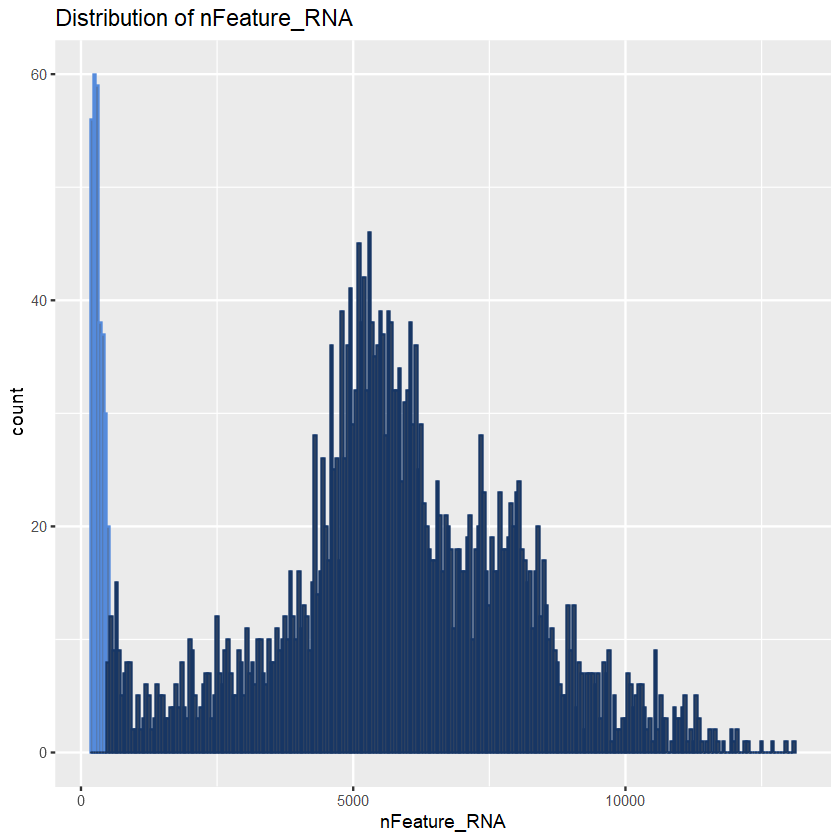

In [25]:
ggplot(qc.metrics) + 
   geom_histogram(aes(nFeature_RNA, 
                  color = ifelse(nFeature_RNA < 500 , "a", "b")),
                  binwidth = 50) + 
  scale_color_manual(values = c("a" = "#558bdc", "b" = "#173664")) +
  ggtitle("Distribution of nFeature_RNA ") + NoLegend()


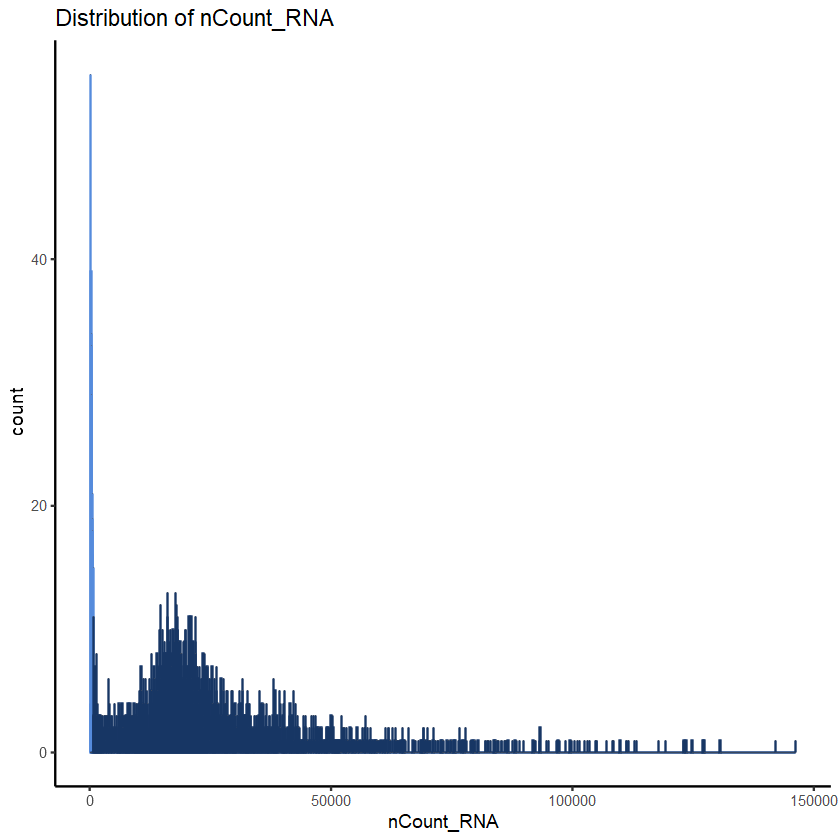

In [27]:
ggplot(qc.metrics) + 
   geom_histogram(aes(nCount_RNA, 
                  color = ifelse(nCount_RNA < 800 , "a", "b")),
                  binwidth = 50) + 
  scale_color_manual(values = c("a" = "#558bdc", "b" = "#173664")) +
  theme_classic()+
  ggtitle("Distribution of nCount_RNA ") + NoLegend()
RunUMAP()

Low-quality cells or empty droplets will often have very few genes.  
Cell doublets or multiplets may exhibit an aberrantly high gene count.


In [ ]:
ggplot(qc.metrics) + 
   geom_histogram(aes(percent.mt, 
                  color = ifelse(percent.mt < x3 , "a", "b")),
                  binwidth = 0.5) + 
  scale_color_manual(values = c("a" = "#173664", "b" = "#558bdc")) + 
  ggtitle("Distribution of Percentage Mitochondrion") + NoLegend()


This metric can identify whether there is a large amount of mitochondrial contamination from dead or dying cells. We define poor quality samples for mitochondrial counts as cells which surpass the 20 mitochondrial ratio mark (unless it is expected in the sample).



In [ ]:
ggplot(qc.metrics) + 
   geom_histogram(aes(percent.ribosomal), 
                  color = "#173664", fill= "#558bdc",
                  binwidth = 0.5) + 
  ggtitle("Distribution of Percentage Ribosomal") + NoLegend()


In [ ]:
ggplot(qc.metrics) + 
   geom_histogram(aes(percent.largest_gene), 
                  color = "#173664", fill= "#558bdc",
                  binwidth = 0.7) + 
  ggtitle("Distribution of Percentage Largest Gene") + NoLegend()


In [35]:
subset(
  seurat_obj,
  nFeature_RNA> 220 &
    percent.mt < x3 ) -> data

data


An object of class Seurat 
28541 features across 3000 samples within 1 assay 
Active assay: RNA (28541 features, 0 variable features)


## After filtering  


In [ ]:
FeatureScatter(data, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") + geom_smooth(method = 'lm')



In [ ]:
as_tibble(
  data[[]],
  rownames="Cell.Barcode"
) -> qc.metrics


In [ ]:
raw_counts$filtered <- NA
raw_counts[rownames(qc.metrics),"filtered"] <- qc.metrics[,"nCount_RNA"]
epsilon <- 1 # pseudo-count to avoid problems with log(0)
boxplot(log2(raw_counts[,c("filtered","nCount_RNA")] + epsilon), pch=".", 
        horizontal=TRUE, cex.axis=0.5,
        las=1, main="Raw counts (before & after filtering)", xlab="log2(Counts +1)", col=viridis(5, alpha=0.6, direction = 1))


In [ ]:
ggplot(qc.metrics) + 
   geom_histogram(aes(nFeature_RNA), 
                  color = "#558bdc", fill= "#173664",
                  binwidth = 50) + 
  ggtitle("Distribution of nFeature_RNA ") + NoLegend()


In [ ]:
ggplot(qc.metrics) + 
   geom_histogram(aes(percent.mt), 
                  color = "#558bdc", fill= "#173664",
                  binwidth = 0.5) + 
  ggtitle("Distribution of Percentage Mitochondrion") + NoLegend()


In [ ]:
ggplot(qc.metrics) + 
   geom_histogram(aes(percent.ribosomal), 
                  color = "#558bdc", fill= "#173664",
                  binwidth = 0.5) + 
  ggtitle("Distribution of Percentage Ribosomal") + NoLegend()


In [ ]:
ggplot(qc.metrics) + 
   geom_histogram(aes(percent.largest_gene), 
                  color = "#558bdc", fill= "#173664",
                  binwidth = 0.7) + 
  ggtitle("Distribution of Percentage Largest Gene") + NoLegend()



# Save seurat object  


In [ ]:
saveRDS(data, file =paste0("./results/Filtered_",sample,".rds"))

